This notebook assists with generating ray-theoretical TauP arrival time plots for icy moon phases. You will need a working TauP installation which you can point to in cell 2.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy as sp
from subprocess import run
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import itertools

In [73]:
dir_path = "~/Documents/Enceladus"

# choose a list of named discontinuities (.nd) files to run TauP with
model_names = ["CadekVanceEPSCBW2", "CadekEPSCBrantutW2", "SealedCore","NeumannEPSCBrantutW2"]
curve_files = []
mod_files = []
for i in range(0,len(model_names)):
    curve_files.append(f"{dir_path}/{model_names[i]}curve.gmt")
    mod_files.append(f"{dir_path}/{model_names[i]}.nd")
print(mod_files)

# let python know where the TauP install is
TauP_install = "~/Software/TauP-2.5.1"

# set source depth (km)
source_dep = "5"

# point to .txt list of phases you want TauP to simulate
phase_list = f"{dir_path}/CurveCorePhases.txt"

['/Users/kd16230/Documents/Enceladus/Vance18Enc/CadekVanceEPSCBW2.nd', '/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd', '/Users/kd16230/Documents/Enceladus/SealedCore/SealedCore.nd', '/Users/kd16230/Documents/Enceladus/Neumann19Enc/NeumannEPSCBrantutW2.nd']


In [74]:
# run TauP_curve on each model
for i in range(0,len(mod_files)):
    run([f'{TauP_install}/bin/taup_curve', '-mod', mod_files[i], '-h', source_dep, '-pf', phase_list, '-o', curve_files[i]])

In [10]:
def Read_Phase_List(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        for line in data:
            line = line.replace('\n','')
            phases = line.split(",")
            
    return phases

In [11]:
def Read_Taup_Curve(file_name, dphases): # dphases to check against what's come out
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        break_list = []
        line_number = -1
        phases = []
        placeholder = []
        for line in data:
            line_number += 1
            if '>' in line: #if it's a header line
                placeholder = line.split(" ")
                break_list.append((line_number, placeholder[1])) # the phase name is the second thing on the line
                x.append(float(-1)) #split up the distance and time arrays
                y.append(float(-1))
            else : #or else just record distance and time
                p = line.split()
                x.append(float(p[0]))
                y.append(float(p[1]))
        
        break_list.append((-1, 'End'))
        break_list = np.array(break_list)
        #if (break_list[:-1,1]==dphases).all() :
            #print("Phase lists match.")
        #else :
            #print("! Phase lists do not match.")
            #print(break_list[:-1,1])
            #print(dphases)
        distance = {}
        time = {}
        for i in range(0, len(break_list[:,0])-1) : #for i over the length of the list of line numbers where it's a new phase
            phase = break_list[i,1]
            if phase == "Shadow":
                phase = break_list[i-1,1]+"1" # deals with multipathing and shadow zones in the TauP output
            print(phase)
            distance[phase] = x[(int(break_list[i,0])+1):int(break_list[i+1,0])] #takes values on line numbers between breaks
            time[phase] = y[(int(break_list[i,0])+1):int(break_list[i+1,0])]
            
            
        titlelist = placeholder[4:13]
        titlelist = [t.replace('\n', '') for t in titlelist]
        title = " ".join(titlelist)
        print(title)

    return break_list, distance, time, title

In [12]:
# read in the phases requested from TauP
input_phases = Read_Phase_List(phase_list)
print(input_phases)

/Users/kd16230/Documents/Enceladus/CurveCorePhases.txt
['PKIKP', 'SKIKS', 'PKIIKP', 'SKIIKS', 'PKikKIKP', 'PKikKIIKP', 'SKikKIKP', 'SKikKIIKP']


In [13]:
i = 0
breaks = {}
distances = {}
times = {}
title = {}

# breaks variable stores the line number where each phase begins in curve output
for model in model_names:
    breaks[model], distances[model], times[model], title[model]= Read_Taup_Curve(curve_files[i], input_phases)
    i = i+1

print(breaks)
"""colours= {}
for j in range(0, len(dream_phases)) :
    if dream_phases[j] == breaks['~/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd'][j,1] :
        colours[breaks['~/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd'][j,1]] = f"C{j}"
        
print(colours)"""

/Users/kd16230/Documents/Enceladus/Vance18Enc/CadekVanceEPSCBW2curve.gmt
PKIKP
SKIKS
PKIIKP
SKIIKS
PKikKIKP
PKikKIIKP
SKikKIKP
SKikKIIKP
source depth of 5.0 kilometers in the CadekVanceEPSCBW2 model
/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2curve.gmt
PKIKP
SKIKS
PKIIKP
SKIIKS
PKikKIKP
PKikKIIKP
SKikKIKP
SKikKIIKP
source depth of 5.0 kilometers in the CadekEPSCBrantutW2 model
/Users/kd16230/Documents/Enceladus/SealedCore/SealedCorecurve.gmt
PKIKP
PKIKP1
SKIKS
SKIKS1
PKIIKP
PKIIKP1
SKIIKS
SKIIKS1
PKikKIKP
PKikKIKP1
PKikKIIKP
PKikKIIKP1
SKikKIKP
SKikKIKP1
SKikKIIKP
SKikKIIKP1

/Users/kd16230/Documents/Enceladus/Neumann19Enc/NeumannEPSCBrantutW2curve.gmt
PKIKP
SKIKS
PKIIKP
SKIIKS
PKikKIKP
PKikKIIKP
SKikKIKP
SKikKIIKP
source depth of 5.0 kilometers in the NeumannEPSCBrantutW2 model
{'CadekVanceEPSCBW2': array([['0', 'PKIKP'],
       ['116', 'SKIKS'],
       ['232', 'PKIIKP'],
       ['349', 'SKIIKS'],
       ['466', 'PKikKIKP'],
       ['582', 'PKikKIIKP'],
       ['69

'colours= {}\nfor j in range(0, len(dream_phases)) :\n    if dream_phases[j] == breaks[\'/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd\'][j,1] :\n        colours[breaks[\'/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd\'][j,1]] = f"C{j}"\n        \nprint(colours)'

skipping PKIKP
skipping PKIIKP
skipping SKIIKS
skipping PKikKIKP
skipping PKikKIIKP
skipping SKikKIKP
skipping SKikKIIKP
skipping PKIKP
skipping PKIIKP
skipping SKIIKS
skipping PKikKIKP
skipping PKikKIIKP
skipping SKikKIKP
skipping SKikKIIKP
skipping PKIKP
skipping PKIKP1
skipping PKIIKP
skipping PKIIKP1
skipping SKIIKS
skipping SKIIKS1
skipping PKikKIKP
skipping PKikKIKP1
skipping PKikKIIKP
skipping PKikKIIKP1
skipping SKikKIKP
skipping SKikKIKP1
skipping SKikKIIKP
skipping SKikKIIKP1
skipping PKIKP
skipping PKIIKP
skipping SKIIKS
skipping PKikKIKP
skipping PKikKIIKP
skipping SKikKIKP
skipping SKikKIIKP
skippingPKIKP
skippingSKIKS
skippingPKIIKP
skippingSKIIKS
skippingPKikKIIKP
skippingSKikKIKP
skippingSKikKIIKP
skippingPKIKP
skippingSKIKS
skippingPKIIKP
skippingSKIIKS
skippingPKikKIIKP
skippingSKikKIKP
skippingSKikKIIKP
skippingPKIKP
skippingPKIKP1
skippingSKIKS
skippingSKIKS1
skippingPKIIKP
skippingPKIIKP1
skippingSKIIKS
skippingSKIIKS1
skippingPKikKIIKP
skippingPKikKIIKP1
skippingS

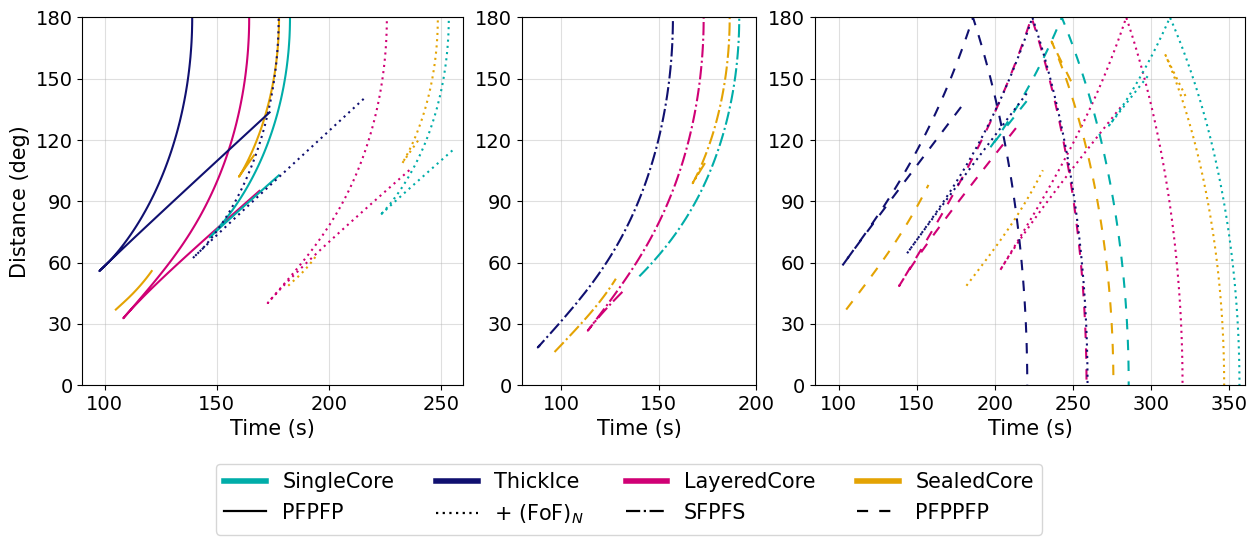

In [51]:
### plot results ###

# setting up plot parameters
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
colours = ['#d00075','#00ada9','#e4a303','#101070'] # a colour for each model
i = 0

fig = plt.figure(figsize=(15,6))
gs = GridSpec(10,24,wspace=0.25,hspace=0.25)

ax0 = fig.add_subplot(gs[:8,9:14])

# plot SFPFS for all models in the central panel (ax0)
for model in model_names:
    for phase in distances[model].keys():
        if phase == 'SKIKS' or phase == 'SKIKS1':
            plt.plot(times[model][phase],distances[model][phase],label=phase,linestyle='-.',color = colours[i])       
        else:
            print(f'skipping {phase}')
           
    i = i+1
    curvea_legend = [Line2D([0],[0],linestyle='-.',linewidth=1.6,color='k',label='SFPFS')]
    #plt.legend(handles=curvea_legend,loc="lower right", prop={'size':12})
    plt.grid(which='both')
    ax0.set_yticks([0,30,60,90,120,150,180])
    ax0.grid(alpha=0.4)
    plt.xlabel('Time (s)')
    plt.ylim(ymin=0, ymax=180)
    plt.xlim(xmin=80, xmax=200)

# reset for next plot panel
i = 0
ax1 = fig.add_subplot(gs[:8,:8])
for model in model_names:
    for phase in distances[model].keys():
        if 'PKIKP' in phase:
            plt.plot(times[model][phase],distances[model][phase],label=phase,linestyle='-',color = colours[i])
        if 'PKikKIKP' in phase:
            plt.plot(times[model][phase],distances[model][phase],label=phase,linestyle=(0,(1,2)),color = colours[i])
        else:
            print(f'skipping{phase}')

           
    i = i+1
    plt.grid(which='both')
    
    curve_legend = [Line2D([0],[0],linestyle='-',linewidth=1.6,color='k',label='PFPFP'),Line2D([0],[0],linewidth=1.6,linestyle=(0,(1,2)),color='k',label='+ (FoF)$_N$')]
    #plt.legend(handles=curve_legend,loc="lower right",prop={'size':12})
    plt.ylabel('Distance (deg)')
    plt.xlabel('Time (s)')
    plt.ylim(ymin=0, ymax=180)
    plt.xlim(xmin=90, xmax=260)
    ax1.set_yticks([0,30,60,90,120,150,180])
    ax1.grid(alpha=0.4)

# reset for next plot panel
i = 0
ax2 = fig.add_subplot(gs[:8,15:])
for model in model_names:
    for phase in distances[model].keys():
        if 'PKIIKP' in phase:
            plt.plot(times[model][phase],distances[model][phase],label=phase,linestyle=(0,(5,5)),color = colours[i])       
        if 'PKikKIIKP' in phase:
            plt.plot(times[model][phase],distances[model][phase],label=phase,linestyle=(0,(1,2)),color = colours[i])
        else:
            print(f'skipping {phase}')
           
    i = i+1
    curvea_legend = [Line2D([0],[0],linestyle=(0,(5,5)),linewidth=1.6,color='k',label='PFPPFP')]
    #plt.legend(handles=curvea_legend,loc="lower left", prop={'size':12})
    plt.grid(which='both')
    ax2.set_yticks([0,30,60,90,120,150,180])
    ax2.grid(alpha=0.4)
    plt.xlabel('Time (s)')
    plt.ylim(ymin=0, ymax=180)
    plt.xlim(xmin=85, xmax=360)

# manual legend creation
legend_data = [Line2D([0],[0],lw=4,color='#00ada9', label='SingleCore'),               
               Line2D([0],[0],linestyle='-',linewidth=1.6,color='k',label='PFPFP'),               
               Line2D([0],[0],lw=4,color='#101070',label='ThickIce'),
               Line2D([0],[0],linewidth=1.6,linestyle=(0,(1,2)),color='k',label='+ (FoF)$_N$'),
               Line2D([0],[0],lw=4,color='#d00075', label='LayeredCore'),
               Line2D([0],[0],linestyle='-.',linewidth=1.6,color='k',label='SFPFS'),
               Line2D([0],[0],lw=4,color='#e4a303', label='SealedCore'),
               Line2D([0],[0],linestyle=(0,(5,5)),linewidth=1.6,color='k',label='PFPPFP')]
fig.legend(handles=legend_data,loc='lower center',ncol=4,fontsize=15)

plt.show()

## 